In [6]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go

import sklearn.metrics
import scipy.integrate as integrate
import scipy.optimize as sco

import fluids as fds
import ht 

import plot_functions as pfun

import general as gen
import model as ty
import proc as pr
import heat_transfer as bht
# importing sys
import sys
sys.path.insert(0,r'C:\Users\valen\Dropbox (DualSun)\PC\Documents\GitHub\RD-systems-and-test-benches\thermal')
import SK_standard as sk

In [2]:
input_name = r'\Inputs_V4.41-NI-glass-glass.xlsx'
hyp_name = r'\Model_hypotheses.xlsx'
data_path = r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Steady-state conditions inputs'
data_name = r'\221223_TUV_test_conditions_V4.41GGA_MPP.xlsx'

par = pr.import_input(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Inputs',input_name)
hyp = pr.create_dict_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Hypotheses',hyp_name,'Main')
condi = pr.create_inputs_from_excel(data_path+data_name,par,hyp)

{'exchanger': {'name': nan, 'eta_nom': 0.201, 'Eff_T': -0.0034000000000000002, 'T_ref': 298.15, 'Eff_G': 0, 'G_ref': 1000, 'X_corr': 1, 'tau_g': 0.8, 'alpha_g': 0.05, 'eps_PV': 0.9, 'eps_g': 0.9, 'eps_bs': 1, 'w_pan': 1.134, 'L_pan': 1.708, 'orientation': 'portrait', 'lambd_upper_glass': 0.002, 'lambd_upper_EVA': 0.000515, 'lambd_si': 0.00015, 'lambd_lower_EVA': 0.000515, 'lambd_PVDF': 0.0, 'lambd_PET': 0.0, 'lambd_adh': 0.0, 'lambd_lower_glass': 0.002, 'k_glass': 0.8, 'k_EVA': 0.24, 'k_si': 60, 'k_PVDF': 0.2, 'k_PET': 0.3, 'k_adh': 0.2, 'L_abs': 1.342, 'w_abs': 0.976, 'geometry': 'harp', 'N_harp': 300, 'N_meander': 1, 'L_tube': 1.342, 'tube_geometry': 'rectangular', 'H_tube': 0.002, 'w_tube': 0.00281, 'W': 0.00335, 'l_c': 0.003, 'p_ext_tube': 0.00335, 'p_ext_tube_rad': 0.00335, 'lambd_air': 0.0, 'lambd_conductive_plate': 0.0, 'lambd_abs': 0.00035, 'lambd_riser_plate': 0.0, 'lambd_riser_back': 0.00035, 'lambd_ins': 0.00011999999999999999, 'eps_hx_top': 0, 'eps_hx_back': 0.8, 'eps_ins':

In [3]:
df_res,X,list_res = ty.simu_condi(par,hyp,condi)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [4]:
pr.disp_html(df_res)

,G,-(T_m - T_a),-(T_m - T_a)^2,-up x (T_m - T_a),Gp,dTm/dt,up x G,up x Gp,-(T_m - T_a)^4,mdot,T_amb,u,h_top_g,h_back,h_rad_back,h_back_tube,h_rad_back_tube,h_back_fins,h_rad_f,h_fluid,T_PV,T_fluid_in,T_tube_mean,h_rad,X_celltemp,eta_PV,S,T_fluid_out,T_fluid_mean,T_Base_mean,T_absfin_mean,T_abs_mean,Q_absfin_back,T_ins_tube_mean,T_ins_absfin_mean,T_ins_mean,T_PV_Base_mean,T_PV_absfin_mean,Q_top_conv,Q_top_rad,Q_PV_plate,Q_PV_Base,Q_PV_absfin,Q_tube_fluid,Q_Base_tube,Q_absfins_Base,Q_tube_back_conv,Q_tube_back_rad,Q_ins_tube_back_conv,Q_ins_tube_back_rad,Q_ins_absfin_back_conv,Q_ins_absfin_back_rad,Q_f01,Q_S,DT,Tm,T_m en °C,Cp(T),Qdot,Qdot / AG
0,1003.0,6.726860,0.0,-17.489835,0.0,0.0,2607.8,10.4,-2047.620655,0.06080,303.992,0.4,3.780643,1.676069,4.942870,1.676069,4.942860,1.676069,0.0,642.212753,301.172548,294.876,297.757030,5.654949,0.989718,0.198933,642.775874,299.654280,297.322529,297.760784,297.760887,297.760812,-0.019311,297.776776,297.780620,297.777195,301.172521,301.172777,-0.044734,-0.071679,3.298579,2.953953,0.344643,3.602442,3.325084,0.364689,-0.046981,-0.138551,-0.046832,-0.138112,-0.004890,-0.014421,-0.092416,2.889727,4.778280,297.265140,24.115140,4182.043809,1214.965067,627.282065
1,1003.0,7.193131,0.0,-18.702140,0.0,0.0,2607.8,10.4,-2677.144701,0.06082,304.133,0.4,3.790742,1.736200,4.938655,1.736200,4.938645,1.736200,0.0,641.843366,300.884541,294.514,297.440017,5.650875,0.990697,0.199130,642.618058,299.365738,296.998561,297.443804,297.443909,297.443833,-0.020905,297.461392,297.465271,297.461815,300.884514,300.884771,-0.051996,-0.082526,3.326590,2.979037,0.347570,3.657996,3.355043,0.369247,-0.052242,-0.148602,-0.052075,-0.148127,-0.005437,-0.015467,-0.102753,2.889018,4.851738,296.939869,23.789869,4182.231039,1234.104118,637.163487
2,1003.0,7.111827,0.0,-8.534192,0.0,0.0,1203.6,4.8,-2558.142138,0.06075,303.279,1.8,7.636721,1.730450,4.898976,1.730450,4.898965,1.730450,0.0,641.030042,300.162463,293.716,296.679502,5.606737,0.993161,0.199625,642.220532,298.618347,296.233690,296.683333,296.683438,296.683361,-0.020472,296.700436,296.704359,296.700864,300.162437,300.162690,-0.099401,-0.078556,3.363711,3.012280,0.351448,3.689424,3.392361,0.372759,-0.051341,-0.145349,-0.051178,-0.144888,-0.005344,-0.015129,-0.100994,2.887231,4.902347,296.167173,23.017173,4182.698918,1245.681147,643.140666
3,1003.0,7.009373,0.0,-8.411247,0.0,0.0,1203.6,4.8,-2413.885134,0.06079,303.503,1.8,7.636116,1.715360,4.912393,1.715360,4.912383,1.715360,0.0,641.373351,300.479995,294.053,297.003854,5.621837,0.992082,0.199408,642.394672,298.934255,296.559779,297.007676,297.007781,297.007705,-0.020156,297.024464,297.028379,297.024891,300.479968,300.480221,-0.096282,-0.076404,3.357124,3.006382,0.350760,3.677010,3.385378,0.371746,-0.050120,-0.143531,-0.049961,-0.143076,-0.005217,-0.014939,-0.098593,2.888014,4.881255,296.493627,23.343627,4182.497232,1241.078563,640.764368
4,1003.0,5.525796,0.0,3.315478,0.0,0.0,-601.8,-2.4,-932.351138,0.06082,303.236,3.6,11.788985,1.509582,4.934915,1.509582,4.934905,1.509582,0.0,642.733616,301.589899,295.386,298.201663,5.645281,0.988311,0.198651,643.002786,300.034407,297.779013,298.205383,298.205484,298.205411,-0.015180,298.217189,298.220997,298.217604,301.589874,301.590119,-0.077231,-0.041777,3.272235,2.930362,0.341890,3.507028,3.294382,0.357783,-0.034166,-0.111691,-0.034061,-0.111347,-0.003556,-0.011624,-0.067236,2.890748,4.648407,297.710204,24.560204,4181.796753,1182.261396,610.397277
5,1003.0,5.118680,0.0,3.071208,0.0,0.0,-601.8,-2.4,-686.486209,0.06079,303.229,3.6,11.777662,1.448223,4.944297,1.448223,4.944287,1.448223,0.0,643.181370,301.944600,295.824,298.593054,5.655018,0.987104,0.198408,643.197527,300.396641,298.177644,298.596731,298.596831,298.596760,-0.013866,298.607236,298.611001,298.607647,301.944575,301.944820,-0.058805,-0.032654,3.236803,2.898632,0.338189,3.449358,3.257128,0.352714,-0.030184,-0.103048,-0.030091,-0.102733,-0.003141,-0.010725,-0.059404,2.891623,4.572641,298.110320,24.960320,4181.583493,1162.358203,60

In [5]:
[tab,X] = sk.find_SK(condi,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])

[tab_m,X_m] = sk.find_SK(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df['Linear fit model 1D'] = X_m[0]

pr.disp_html(X_df)

# X_df.to_csv('V4.41_glass_backsheet_MPP.csv',sep=";")

,TÜV,Linear fit model 1D
"eta0,hem",0.486248,0.475469
a1,21.363516,24.834341
a2,0.000000,0.000000
a3,1.070499,1.217745
a4,0.000000,0.000000
a5,0.000000,0.000000
a6,0.012652,0.004475
a7,0.000000,0.000000
a8,0.000000,0.000000


21.726


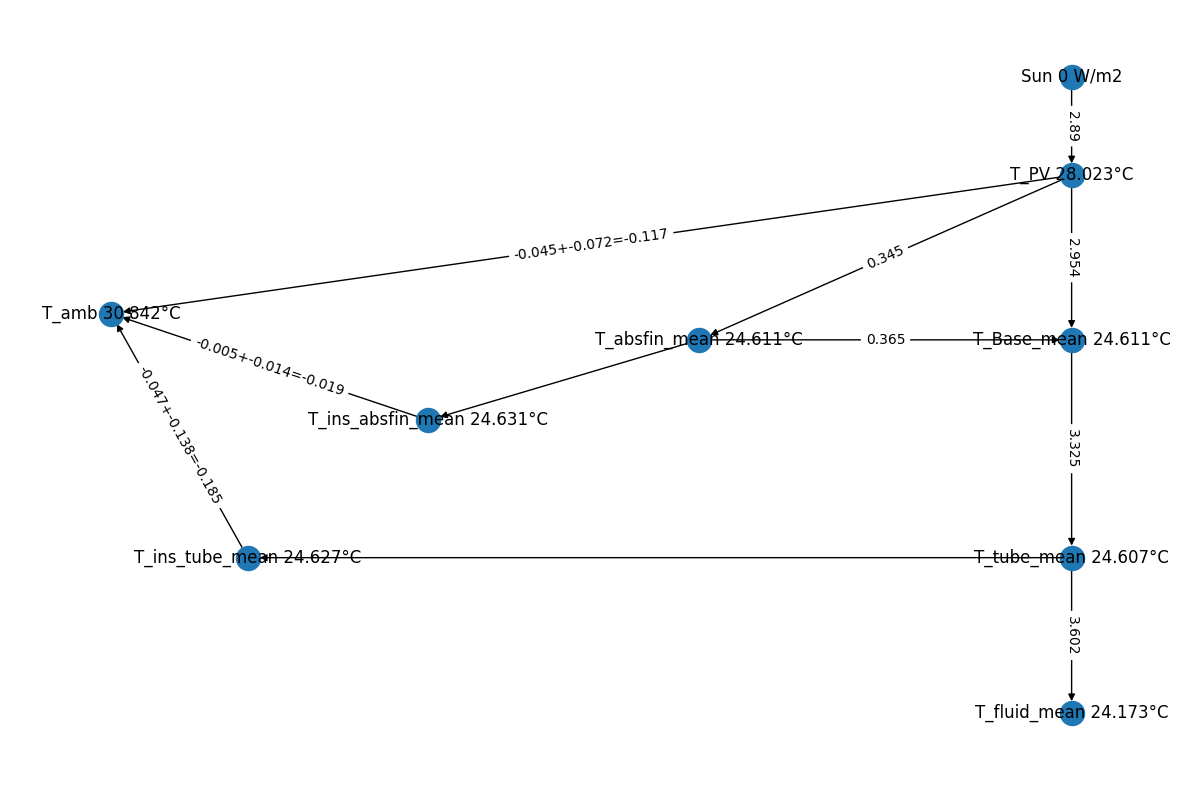

In [7]:
pfun.plot_graph(df_res,par,0)

In [ ]:
22.37-2*1.3

In [ ]:
par["manifold"]["L_f0"]

In [ ]:
pr.disp_html(df_res)

In [ ]:
condi["dTm/dt"] = 0.

u_list = condi["u"].unique()
color_list_1 = ['lightgreen','skyblue','darksalmon']
color_list_2 = ['green','darkblue','tomato']

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',marker_color = color_list_1[i],
                        name='Model 1D - u = '+str(u_list[i])+' m/s',
                        ))

    
    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=sk.comp_power_rG_coeff_df(X_df['Linear fit model 1D'],df_res.loc[df_res["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(color=color_list_1[i], width=1,
                            dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s',
                        ))
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['Tm - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',marker_color = color_list_2[i],
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['Tm - T_a'], y=sk.comp_power_rG_coeff_df(X_df['TÜV'],condi.loc[condi["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(color=color_list_2[i],width=1
                            ),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
fig.write_html('V4.41_glass_backsheet_MPP.html')

In [ ]:
pr.disp_html(df_res)

In [ ]:
[tab,X] = sk.find_SK_SST(condi,par['A_G'],columns_list=[0,1,0,1,0,0,0,0,0])
[tab_m,X_m] = sk.find_SK_SST(df_res,par['A_G'],columns_list=[0,1,0,1,0,0,0,0,0])

In [ ]:
pr.display_a_i(X)
pr.display_a_i(X_m)

In [ ]:
condi

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = [0.7,2.1,3.9]

color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
mse = sklearn.metrics.mean_squared_error(df_res['Q_dot / A_G'],condi['Q_dot / A_G'])
print(math.sqrt(mse))

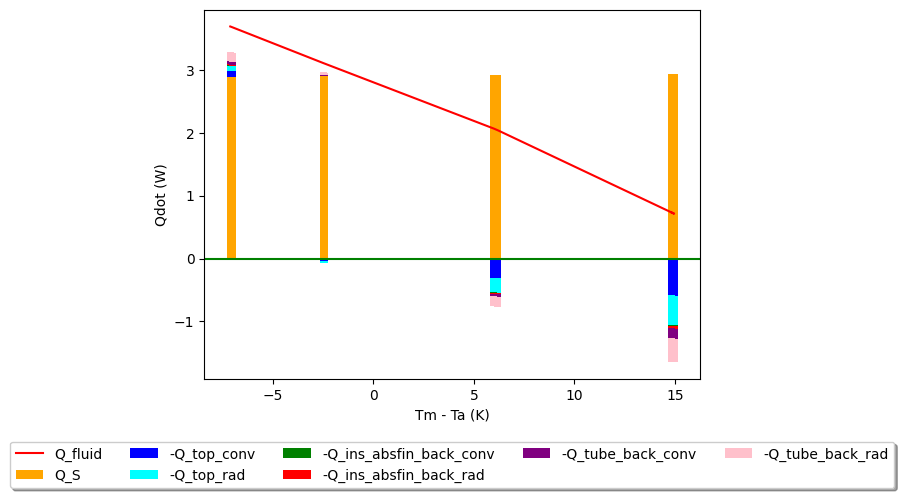

In [8]:
u_list = df_res['u'].unique()

# powers = ["Q_S","Q_top_conv","Q_top_rad","Q_tube_back_conv","Q_tube_back_rad","Q_f01"]
df_res["-Q_top_conv"] = -df_res["Q_top_conv"]
df_res["-Q_top_rad"] = -df_res["Q_top_rad"]
df_res["-Q_ins_absfin_back_conv"] = -df_res["Q_ins_absfin_back_conv"]
df_res["-Q_ins_absfin_back_rad"] = -df_res["Q_ins_absfin_back_rad"]
df_res["-Q_tube_back_conv"] = -df_res["Q_tube_back_conv"]
df_res["-Q_tube_back_rad"] = -df_res["Q_tube_back_rad"]
# df_res["-Q_f01"] = -df_res["Q_f01"]

df_select_u = df_res.loc[df_res["u"]==u_list[1]]

powers = ["Q_S","-Q_top_conv","-Q_top_rad","-Q_ins_absfin_back_conv","-Q_ins_absfin_back_rad","-Q_tube_back_conv","-Q_tube_back_rad"]

df_hist = df_select_u

dict_pos = {}
dict_neg = {}
dict_pos_agg = {}
dict_neg_agg = {}

DT_list = []
for DT in df_hist["-(T_m - T_a)"]:
    DT_list.append(-DT)

# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_tube_back"]
# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_fluid_back","-Q_f01"]


for i in range(len(powers)):
    str = powers[i]
    
    dict_pos[str] = np.array(ty.pos_df(df_hist,str))
    dict_neg[str] = np.array(ty.neg_df(df_hist,str))

    if i==0:
        dict_pos_agg[str] = 0*np.array(ty.pos_df(df_hist,str))
        dict_neg_agg[str] = dict_pos_agg[str]

    else:
        dict_pos_agg[str] = dict_pos_agg[powers[i-1]] + dict_pos[powers[i-1]]
        dict_neg_agg[str] = dict_neg_agg[powers[i-1]] + dict_neg[powers[i-1]]

fig, ax = plt.subplots()

width = 0.35

# labels_list = ['Sun','Front convection','Front radiation','Back convection and radiation']
labels_list = powers
colors_list = ['orange','blue','cyan','green','red','purple','pink']

for i,str in enumerate(powers):
    ax.bar(DT_list, dict_pos[str], width, bottom=dict_pos_agg[str], label=labels_list[i], color=colors_list[i])
    ax.bar(DT_list, dict_neg[str], width, bottom=dict_neg_agg[str], color=colors_list[i])

ax.plot(DT_list,df_hist["Q_tube_fluid"],color="red",label="Q_fluid")
# ax.plot(labels,np.array(N_disp*[list_PL[q]]))

# ax.set_ylabel('PL (Pa)')
# ax.set_title('SPRING')
ax.set_xlabel("Tm - Ta (K)")
ax.set_ylabel("Qdot (W)")
ax.axhline(y = 0., color = 'g', linestyle = '-')
  
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()